**Adapted by [Scipy Lecture Notes:](http://www.scipy-lectures.org/index.html) Tutorials on the scientific Python ecosystem: a quick introduction to central tools and techniques. The different chapters each correspond to a 1 to 2 hours course with increasing level of expertise, from beginner to expert. This jupyter notebook is devoted to the Section [1.3.3. More elaborate arrays](http://www.scipy-lectures.org/intro/numpy/elaborate_arrays.html) of Numpy chapter.**

# 1.3.3. More elaborate arrays


## 1.3.3.1. More data types

**Casting**

In [1]:
import numpy as np
# “Bigger” type wins in mixed-type operations:
np.array([1, 2, 3]) + 1.5

array([2.5, 3.5, 4.5])

In [2]:
# Assignment never changes the type!
a = np.array([1, 2, 3])
a.dtype

dtype('int64')

In [3]:
a[0] = 1.9     # <-- float is truncated to integer
a

array([1, 2, 3])

In [4]:
# Forced casts:
a = np.array([1.7, 1.2, 1.6])
b = a.astype(int)  # <-- truncates to integer
b

array([1, 1, 1])

In [5]:
# Rounding:
a = np.array([1.2, 1.5, 1.6, 2.5, 3.5, 4.5])
b = np.around(a)
b                    # still floating-point

array([1., 2., 2., 2., 4., 4.])

In [6]:
c = np.around(a).astype(int)
c

array([1, 2, 2, 2, 4, 4])

**Different data type sizes**

> **Integers (signed):**
* int8	8 bits
* int16	16 bits
* int32	32 bits (same as int on 32-bit platform)
* int64	64 bits (same as int on 64-bit platform)


In [7]:
np.array([1], dtype=int).dtype

dtype('int64')

In [8]:
np.iinfo(np.int32).max, 2**31 - 1

(2147483647, 2147483647)

> **Unsigned integers:**
* uint8	8 bits
* uint16	16 bits
* uint32	32 bits
* uint64	64 bits


In [9]:
np.iinfo(np.uint32).max, 2**32 - 1

(4294967295, 4294967295)

> **Floating-point numbers:**
* float16	16 bits
* float32	32 bits
* float64	64 bits (same as float)
* float96	96 bits, platform-dependent (same as np.longdouble)
* float128	128 bits, platform-dependent (same as np.longdouble)

In [10]:
np.finfo(np.float32).eps

1.1920929e-07

In [11]:
np.finfo(np.float64).eps

2.220446049250313e-16

In [12]:
np.float32(1e-8) + np.float32(1) == 1

True

In [13]:
np.float64(1e-8) + np.float64(1) == 1

False

> **Complex floating-point numbers:**
* complex64	two 32-bit floats
* complex128	two 64-bit floats
* complex192	two 96-bit floats, platform-dependent
* complex256	two 128-bit floats, platform-dependent


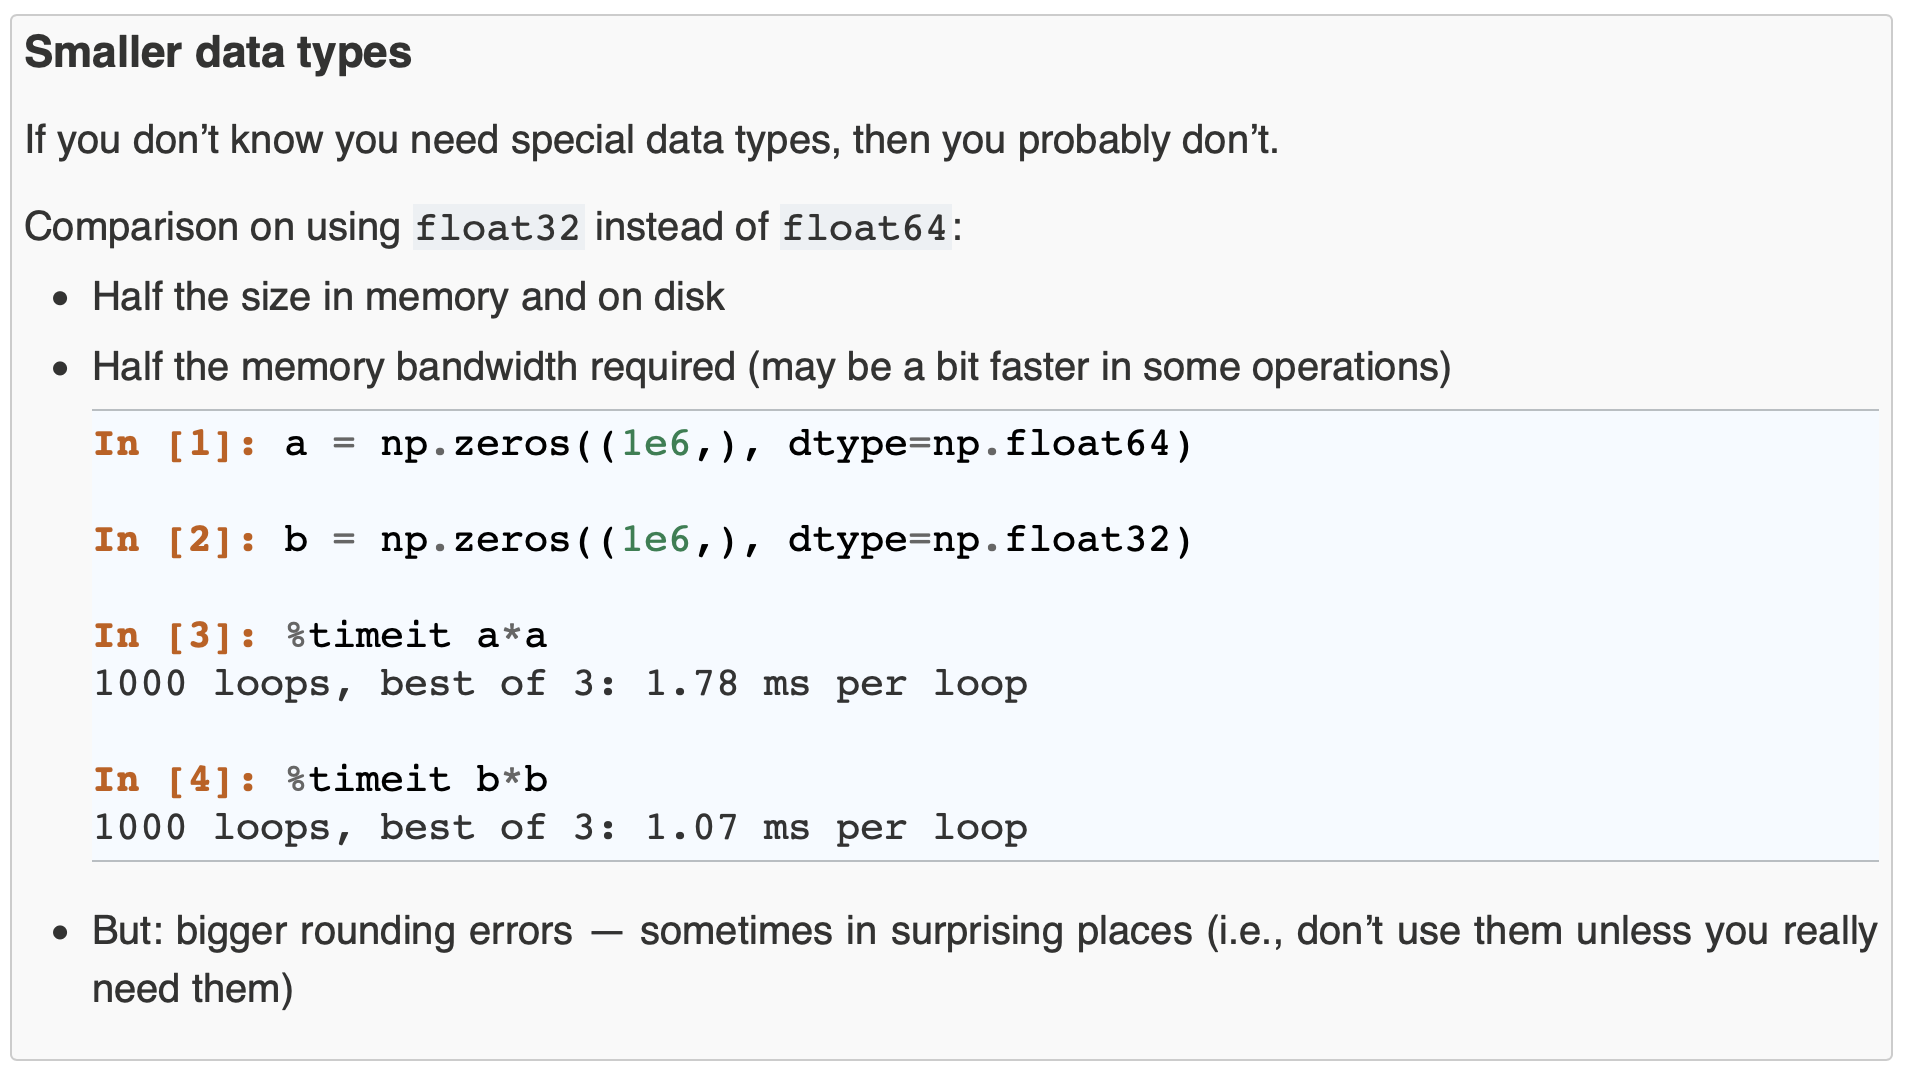

In [14]:
from IPython.display import Image
Image(filename='Images/Type.png')

## 1.3.3.2. Structured data types

> * sensor_code	(4-character string)
* position	(float)
* value	(float)


In [15]:
samples = np.zeros((6,), dtype=[('sensor_code', 'S4'),
                                ('position', float), ('value', float)])
samples.ndim

1

In [16]:
samples.shape

(6,)

In [17]:
samples.dtype.names

('sensor_code', 'position', 'value')

In [18]:
samples[:] = [('ALFA',   1, 0.37), ('BETA', 1, 0.11), ('TAU', 1,   0.13),
              ('ALFA', 1.5, 0.37), ('ALFA', 3, 0.11), ('TAU', 1.2, 0.13)]
samples   

array([(b'ALFA', 1. , 0.37), (b'BETA', 1. , 0.11), (b'TAU', 1. , 0.13),
       (b'ALFA', 1.5, 0.37), (b'ALFA', 3. , 0.11), (b'TAU', 1.2, 0.13)],
      dtype=[('sensor_code', 'S4'), ('position', '<f8'), ('value', '<f8')])

**Field access works by indexing with field names:**

In [19]:
samples['sensor_code']    

array([b'ALFA', b'BETA', b'TAU', b'ALFA', b'ALFA', b'TAU'], dtype='|S4')

In [20]:
samples['value']

array([0.37, 0.11, 0.13, 0.37, 0.11, 0.13])

In [21]:
samples[0]    

(b'ALFA', 1., 0.37)

In [22]:
samples[0]['sensor_code'] = 'TAU'
samples[0] 

(b'TAU', 1., 0.37)

In [23]:
# Multiple fields at once:
samples[['position', 'value']]

array([(1. , 0.37), (1. , 0.11), (1. , 0.13), (1.5, 0.37), (3. , 0.11),
       (1.2, 0.13)], dtype=[('position', '<f8'), ('value', '<f8')])

In [24]:
# Fancy indexing works, as usual:
samples[samples['sensor_code'] == 'ALFA'] 

array([], shape=(0, 6),
      dtype=[('sensor_code', 'S4'), ('position', '<f8'), ('value', '<f8')])

**Note There are a bunch of other syntaxes for constructing structured arrays, see [here](https://docs.scipy.org/doc/numpy/user/basics.rec.html) and [here](https://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html#specifying-and-constructing-data-types).**


## 1.3.3.3. maskedarray: dealing with (propagation of) missing data

In [25]:
# For floats one could use NaN’s, but masks work for all types:
x = np.ma.array([1, 2, 3, 4], mask=[0, 1, 0, 1])
x

masked_array(data=[1, --, 3, --],
             mask=[False,  True, False,  True],
       fill_value=999999)

In [26]:
y = np.ma.array([1, 2, 3, 4], mask=[0, 1, 1, 1])
x + y

masked_array(data=[2, --, --, --],
             mask=[False,  True,  True,  True],
       fill_value=999999)

In [27]:
# Masking versions of common functions:
np.ma.sqrt([1, -1, 2, -2]) 

masked_array(data=[1.0, --, 1.4142135623730951, --],
             mask=[False,  True, False,  True],
       fill_value=1e+20)

**Note There are other useful [array siblings](http://www.scipy-lectures.org/advanced/advanced_numpy/index.html#array-siblings)**

**While it is off topic in a chapter on numpy, let’s take a moment to recall good coding practice, which really do pay off in the long run:**

> **Good practices**
* Explicit variable names (no need of a comment to explain what is in the variable)
* Style: spaces after commas, around =, etc.
A certain number of rules for writing “beautiful” code (and, more importantly, using the same conventions as everybody else!) are given in the [Style Guide for Python Code](https://www.python.org/dev/peps/pep-0008/) and the [Docstring Conventions](https://www.python.org/dev/peps/pep-0257/) page (to manage help strings).
* Except some rare cases, variable names and comments in English.